<a href="https://colab.research.google.com/github/ItunuIjila/itunuijila.github.io/blob/main/Breast_Cancer_Classification_using_hyperparameter_optimization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Classsification Using Machine Learning Models**

**Feedforward neural networks with hyperparameter optimisation**

**Import Libraries**

In [ ]:
#To Import Libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Input, ReLU, LeakyReLU, BatchNormalization
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score


**Read in the dataset**

In [ ]:
#To load my dataset 
BreastData= pd.read_csv('Breast Cancer.csv') 
BreastData.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#To count the number of rows and columns
print("The dimensions of our data frame:\n", 
BreastData.shape) 


The dimensions of our data frame:
 (569, 33)


In [ ]:
#To get information about the dataset

BreastData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#To count the number of null values
BreastData.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Data Preprocessing**

In [ ]:
#TO drop the unneeded column 
BreastData = BreastData.drop(columns =['Unnamed: 32'])


In [ ]:
#To get the new count of rows and colomns
print("The dimensions of our data frame:\n", 
BreastData.shape)

The dimensions of our data frame:
 (569, 32)


In [ ]:
#To count the number of Malignant and Benign cells 
BreastData['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
#Measure of Central Tendency of the dataset
BreastData.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Data Visualization** 

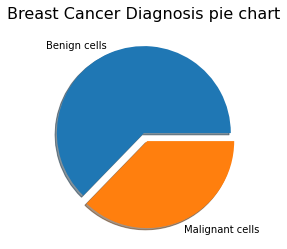

In [ ]:

labels=['Benign cells','Malignant cells ']
plt.pie(BreastData['diagnosis'].value_counts(), explode=(0,0.1), labels=labels,shadow=True)

plt.title('Breast Cancer Diagnosis pie chart', fontsize = 16)
plt.savefig('Breast Cancer Diagnosis pie chart.jpeg')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


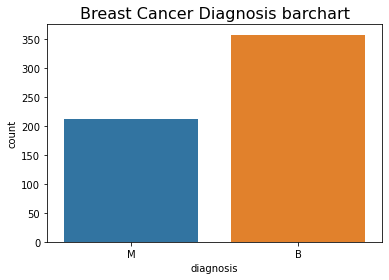

In [ ]:
#To Visualize the diagnosis
sns.countplot(BreastData['diagnosis'], label = 'count')

plt.title('Breast Cancer Diagnosis barchart', fontsize = 16)
plt.savefig('Breast Cancer Diagnosis barchart.jpeg')
plt.show()
 

In [ ]:
#To lookup the data types
print("The data types of our data frame:\n",
BreastData.dtypes)

The data types of our data frame:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst   

In [ ]:
#Encode categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
BreastData.iloc[:,1] = labelencoder_Y.fit_transform(BreastData.iloc[:,1].values)
print(labelencoder_Y.fit_transform(BreastData.iloc[:,1].values))




[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

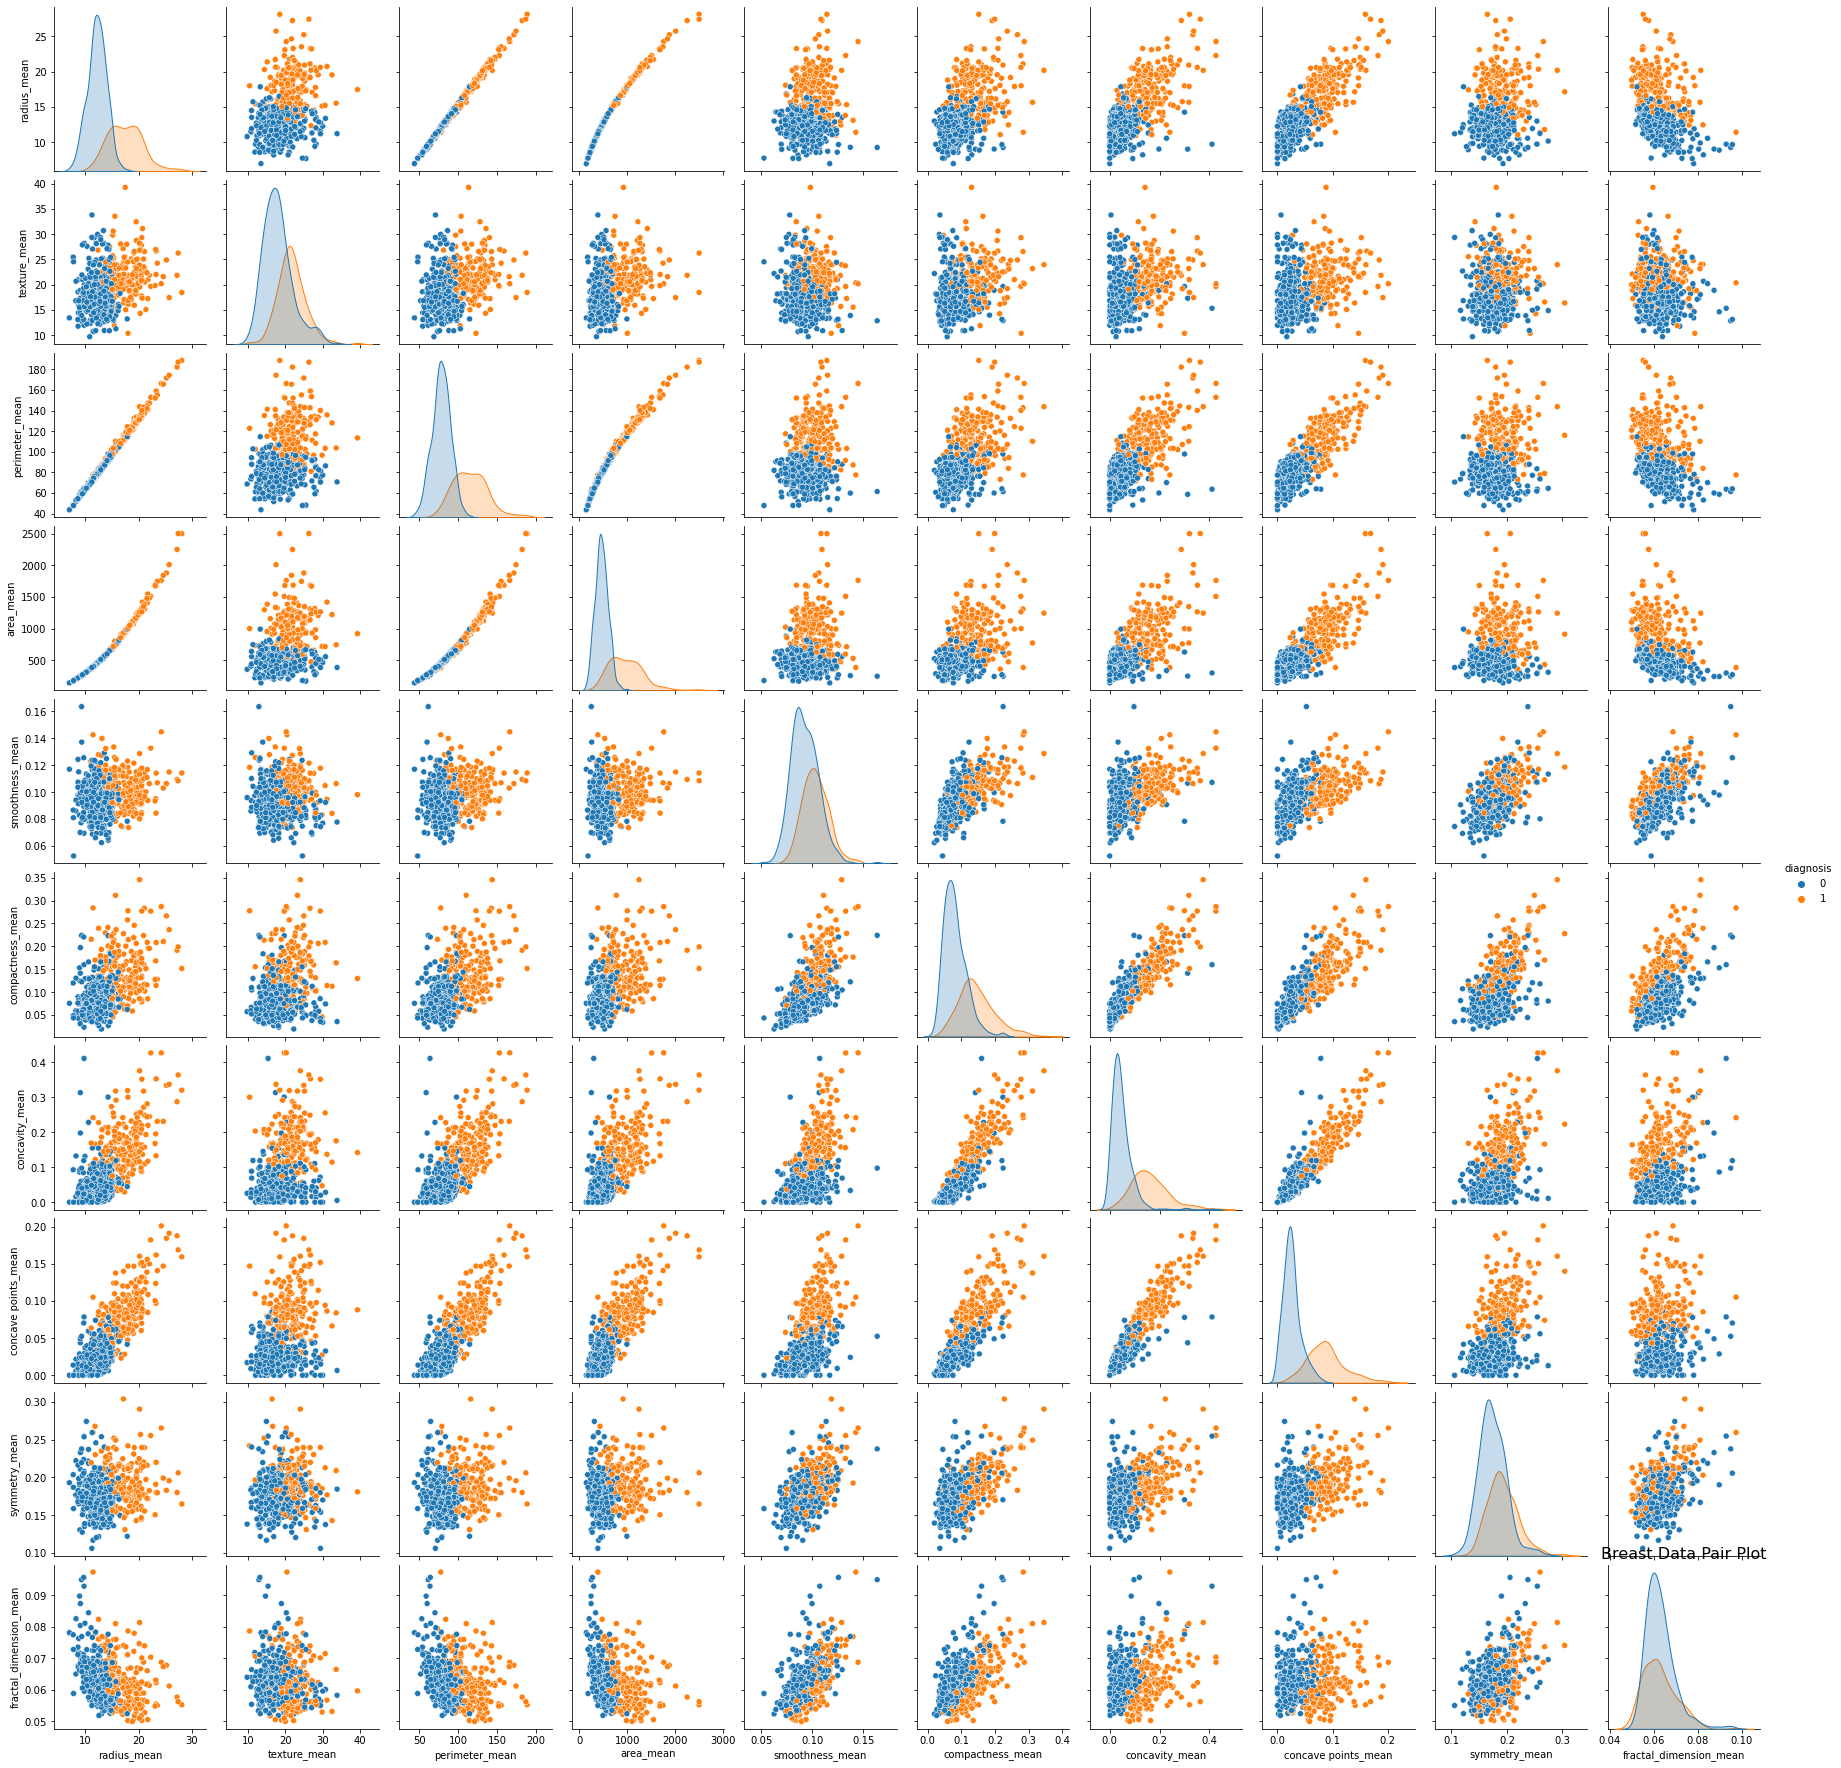

In [ ]:
#To create a pair plot to visualize the data
sns.pairplot(BreastData.iloc[:,1:12], hue = 'diagnosis')

plt.title('Breast Data Pair Plot', fontsize = 16)
plt.savefig('Breast Data pair plot.jpeg')
plt.show()

In [ ]:
#Get the correlation of the columns
BreastData.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


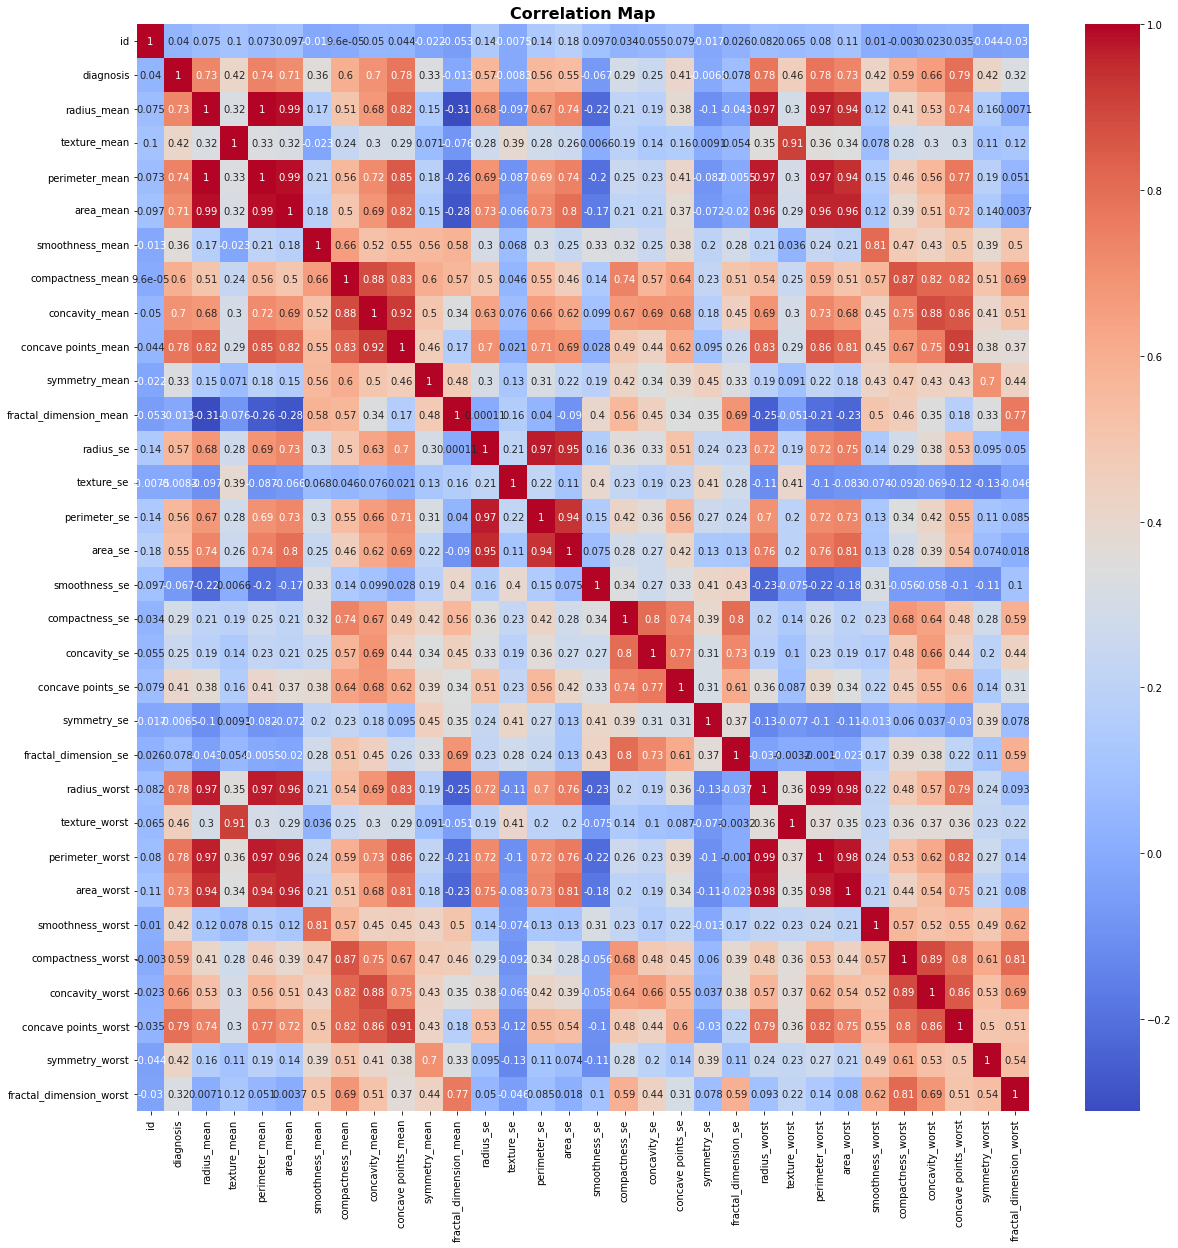

In [ ]:
#To check out the correlation between the columns
plt.figure(figsize=(20,20))
sns.heatmap(BreastData.corr(), annot= True,  cmap= 'coolwarm')
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.savefig('Correlation Map.jpeg')
plt.show()

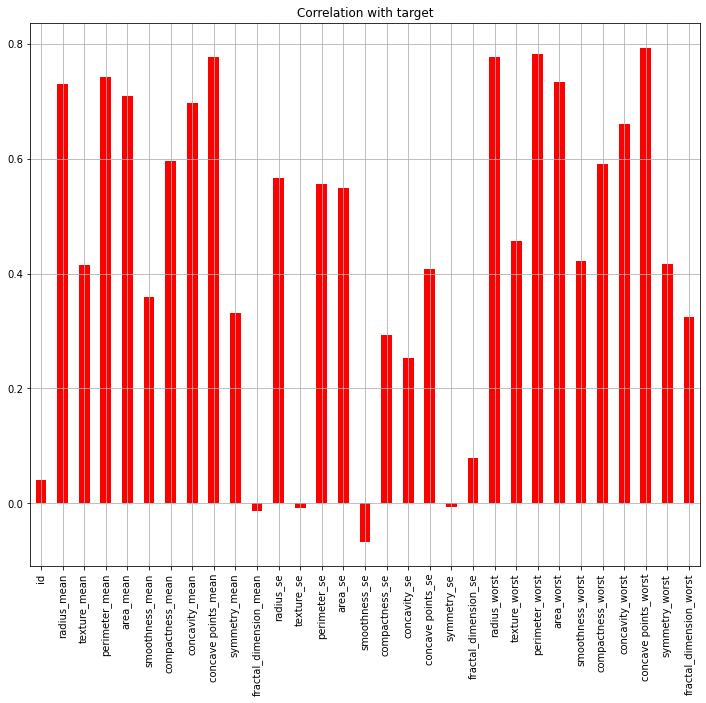

In [ ]:
BreastData.drop('diagnosis', axis=1).corrwith(BreastData.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="red");

#There are only a handful of columns that show negative correlation with the 'diagnosis column'
#Around half of our columns are more than 50% positively correlated to diagnosis column.

plt.savefig('Correlation with Target.jpeg')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


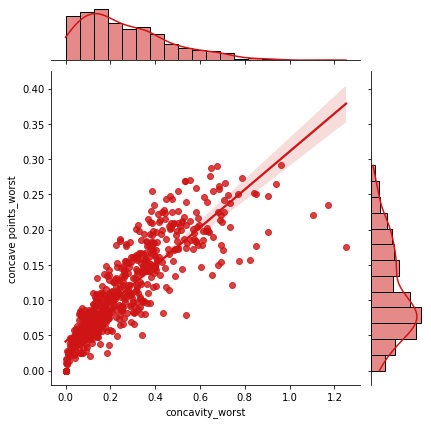

In [ ]:

sns.jointplot(BreastData.loc[:,'concavity_worst'], BreastData.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

plt.savefig('Breast Cancer Diagnosis Joint Plot.jpeg')
plt.show()

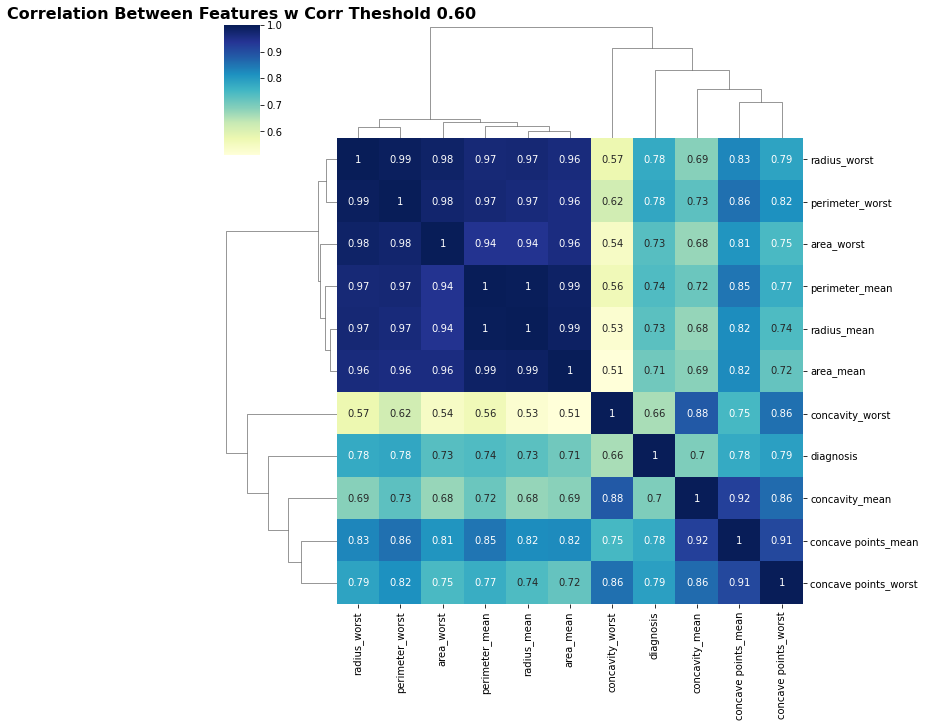

In [ ]:
corr_matrix = BreastData.corr()
threshold = 0.60 
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(BreastData[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Between Features w Corr Theshold 0.60", fontweight = "bold", fontsize=16)
plt.savefig('Correlation Between Features w Corr Theshold 0.60.jpeg')
plt.show()

**Feature Importance**


*  Artificial Neural Network 
*  Decision Trees
*  Naive Bayes
*  Random Forest
*   Support Vector Machine
*   XGBoost
AdaBoost
*   Linear Regression 
*   K- Nearest Neighbour






**Modelling**

**Artificial Neural Network**

In [ ]:

#Split the data into independent(x) and dependent data(y)
X= BreastData.iloc[:, 2:31].values
Y=BreastData.iloc[:, 1].values
#To split into training and test data (75% training data and 25 % testing data)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2)
print("X Train: ", X_train.shape)
print("X Test: ", X_test.shape)
print("Y Train: ", Y_train.shape)
print("Y Test: ", Y_test.shape)


X Train:  (426, 29)
X Test:  (143, 29)
Y Train:  (426,)
Y Test:  (143,)


In [ ]:

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Neural Network
model_ann = Sequential()

model_ann.add(Dense(128, input_shape = (29,)))
model_ann.add(ReLU())
model_ann.add(Dropout(0.1))

model_ann.add(Dense(64))
model_ann.add(ReLU())
model_ann.add(Dropout(0.1))
model_ann.add(Dense(1, activation = "sigmoid"))


model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ann.fit(X_train, Y_train, batch_size=100, epochs=150, validation_data = (X_test,Y_test))

#history = model_ann.fit(X_train,Y_train,epochs = 20, batch_size = 5,validation_data = (X_test,Y_test))
history.history.keys()

#Model Prediction
Y_pred=model_ann.predict(X_test)
print(model_ann.evaluate(X_train,Y_train))
score = model_ann.evaluate(X_train,Y_train, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("Test data MSE: %.6f" % mean_squared_error(Y_test, Y_pred))


Epoch 1/150
5/5 [==============================] - 2s 93ms/step - loss: 0.5850 - accuracy: 0.7488 - val_loss: 0.4137 - val_accuracy: 0.9301
Epoch 2/150
5/5 [==============================] - 0s 15ms/step - loss: 0.3698 - accuracy: 0.9343 - val_loss: 0.2823 - val_accuracy: 0.9441
Epoch 3/150
5/5 [==============================] - 0s 22ms/step - loss: 0.2560 - accuracy: 0.9554 - val_loss: 0.2094 - val_accuracy: 0.9510
Epoch 4/150
5/5 [==============================] - 0s 18ms/step - loss: 0.1887 - accuracy: 0.9577 - val_loss: 0.1675 - val_accuracy: 0.9510
Epoch 5/150
5/5 [==============================] - 0s 16ms/step - loss: 0.1476 - accuracy: 0.9624 - val_loss: 0.1428 - val_accuracy: 0.9580
Epoch 6/150
5/5 [==============================] - 0s 16ms/step - loss: 0.1267 - accuracy: 0.9648 - val_loss: 0.1266 - val_accuracy: 0.9580
Epoch 7/150
5/5 [==============================] - 0s 17ms/step - loss: 0.1107 - accuracy: 0.9695 - val_loss: 0.1147 - val_accuracy: 0.9580
Epoch 8/150
5/5 [===

5/5 [==============================] - 0s 18ms/step - loss: 0.0123 - accuracy: 0.9953 - val_loss: 0.1120 - val_accuracy: 0.9580
Epoch 60/150
5/5 [==============================] - 0s 18ms/step - loss: 0.0139 - accuracy: 0.9953 - val_loss: 0.1124 - val_accuracy: 0.9510
Epoch 61/150
5/5 [==============================] - 0s 16ms/step - loss: 0.0119 - accuracy: 0.9977 - val_loss: 0.1134 - val_accuracy: 0.9510
Epoch 62/150
5/5 [==============================] - 0s 18ms/step - loss: 0.0118 - accuracy: 0.9977 - val_loss: 0.1174 - val_accuracy: 0.9510
Epoch 63/150
5/5 [==============================] - 0s 18ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.1214 - val_accuracy: 0.9510
Epoch 64/150
5/5 [==============================] - 0s 18ms/step - loss: 0.0155 - accuracy: 0.9977 - val_loss: 0.1127 - val_accuracy: 0.9580
Epoch 65/150
5/5 [==============================] - 0s 17ms/step - loss: 0.0111 - accuracy: 0.9977 - val_loss: 0.1047 - val_accuracy: 0.9650
Epoch 66/150
5/5 [========

5/5 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1703 - val_accuracy: 0.9510
Epoch 118/150
5/5 [==============================] - 0s 26ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1725 - val_accuracy: 0.9510
Epoch 119/150
5/5 [==============================] - 0s 17ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1669 - val_accuracy: 0.9510
Epoch 120/150
5/5 [==============================] - 0s 15ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1629 - val_accuracy: 0.9580
Epoch 121/150
5/5 [==============================] - 0s 16ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1580 - val_accuracy: 0.9580
Epoch 122/150
5/5 [==============================] - 0s 16ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1520 - val_accuracy: 0.9650
Epoch 123/150
5/5 [==============================] - 0s 17ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1500 - val_accuracy: 0.9720
Epoch 124/150
5/5 [=

In [ ]:
acc_ann =score [1]
print (acc_ann)

1.0


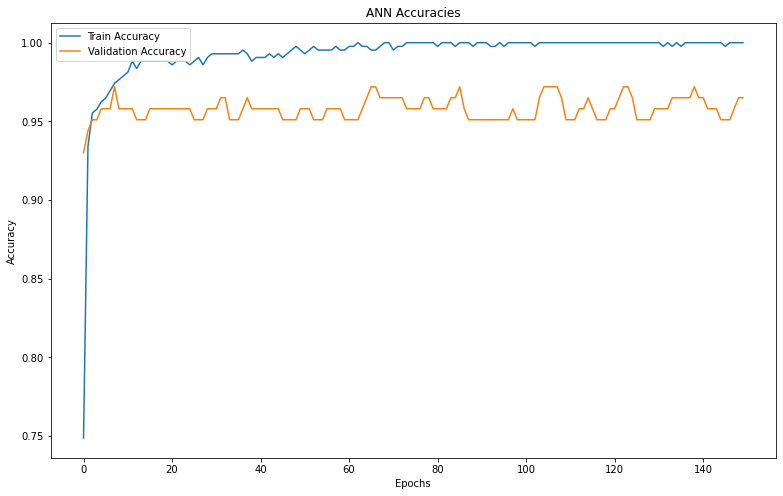

In [ ]:
plt.figure(figsize = (13,8))
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy")
plt.title("ANN Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig('ANN Accuracies.jpeg')
plt.show()

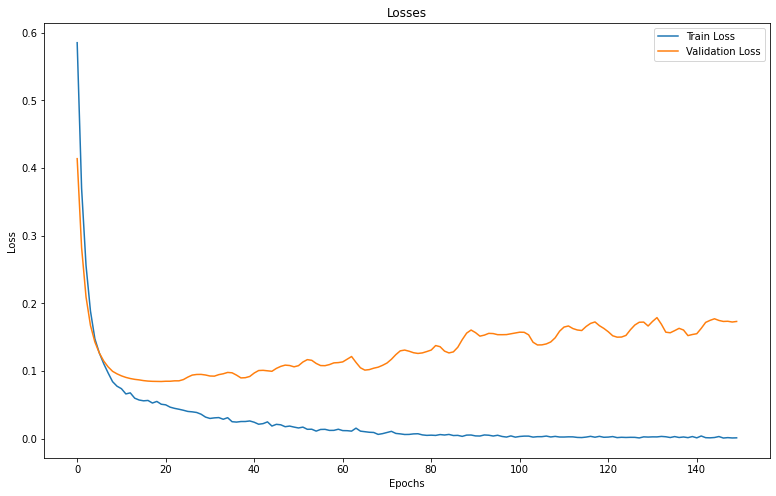

In [ ]:
plt.figure(figsize = (13,8))
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('ANN Losses.jpeg')

plt.show()

### Changing Hyper Parameter 

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='sigmoid', input_shape=(29,)))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=16, epochs=10, verbose=1,validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1920      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
27/27 [==============================] - 

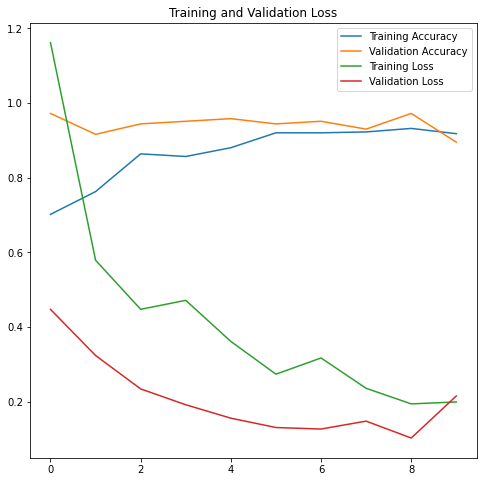

In [ ]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('Model 2 Ann.png', dpi=100)
plt.show()

In [ ]:
#Layers are increased
#Activation function is changed to softmax for the first layer, Sigmoid for the next two layers and relu for the last layer
#The Drop out rate are increased and the unit were changed

model1 = Sequential()
model1.add(Dense(units=4, activation='softmax', input_shape=(29,)))
model1.add(Dropout(0.4))
model1.add(Dense(units=16, activation='sigmoid'))
model1.add(Dropout(0.1))
model1.add(Dense(units=32, activation='sigmoid'))
model1.add(Dropout(0.01))
model1.add(Dense(1, activation='relu'))

model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 120       
                                                                 
 dropout_4 (Dropout)         (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 16)                80        
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
history = model1.fit(X_train, Y_train, batch_size=16, epochs=10, verbose=1,validation_data=(X_test, Y_test))
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
27/27 [==============================] - 2s 18ms/step - loss: 0.6682 - accuracy: 0.6174 - val_loss: 0.6618 - val_accuracy: 0.6084
Epoch 2/10
27/27 [==============================] - 0s 5ms/step - loss: 0.6681 - accuracy: 0.6174 - val_loss: 0.6509 - val_accuracy: 0.6084
Epoch 3/10
27/27 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.6127 - val_loss: 0.6374 - val_accuracy: 0.6084
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 0.6178 - accuracy: 0.6526 - val_loss: 0.6195 - val_accuracy: 0.6084
Epoch 5/10
27/27 [==============================] - 0s 6ms/step - loss: 0.6016 - accuracy: 0.6455 - val_loss: 0.5969 - val_accuracy: 0.6084
Epoch 6/10
27/27 [==============================] - 0s 5ms/step - loss: 0.5784 - accuracy: 0.6737 - val_loss: 0.5694 - val_accuracy: 0.6084
Epoch 7/10
27/27 [==============================] - 0s 6ms/step - loss: 0.5512 - accuracy: 0.7277 - val_loss: 0.5383 - val_accuracy: 0.6084
Epoch 8/10
27/27 [=

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

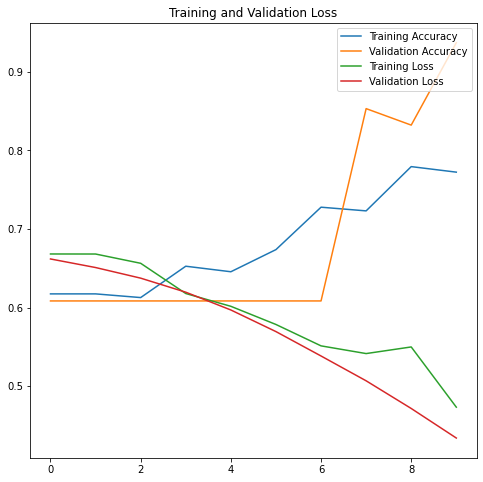

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('Model 3 ANN.png', dpi=100)
plt.show()

In [ ]:
#Still the same values with model 1
#Activation funtions were changed 


#Layers are increased
#Activation function is changed to softmax for the first layer, Sigmoid for the next two layers and relu for the last layer
#The Drop out rate are increased and the unit were changed


model2 = Sequential()
model2.add(Dense(units=4, activation='relu', input_shape=(29,)))
model2.add(Dropout(0.4))
model2.add(Dense(units=16, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dropout(0.01))
model2.add(Dense(1, activation='relu'))

model2.summary()
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 120       
                                                                 
 dropout_7 (Dropout)         (None, 4)                 0         
                                                                 
 dense_11 (Dense)            (None, 16)                80        
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
history = model2.fit(X_train, Y_train, batch_size=16, epochs=100, verbose=1,validation_data=(X_test, Y_test))
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
27/27 [==============================] - 2s 16ms/step - loss: 0.9703 - accuracy: 0.7019 - val_loss: 0.5108 - val_accuracy: 0.7832
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.8028 - val_loss: 0.4281 - val_accuracy: 0.8392
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5531 - accuracy: 0.8216 - val_loss: 0.4650 - val_accuracy: 0.8671
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6472 - accuracy: 0.8122 - val_loss: 0.4337 - val_accuracy: 0.8951
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6032 - accuracy: 0.8075 - val_loss: 0.4176 - val_accuracy: 0.9091
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5428 - accuracy: 0.8357 - val_loss: 0.3306 - val_accuracy: 0.9021
Epoch 7/100
27/27 [==============================] - 0s 6ms/step - loss: 0.5113 - accuracy: 0.8709 - val_loss: 0.4039 - val_accuracy: 0.9161
Epoch 8/100


Epoch 59/100
27/27 [==============================] - 0s 6ms/step - loss: 0.2506 - accuracy: 0.9085 - val_loss: 0.2056 - val_accuracy: 0.9580
Epoch 60/100
27/27 [==============================] - 0s 6ms/step - loss: 0.2566 - accuracy: 0.9085 - val_loss: 0.2056 - val_accuracy: 0.9580
Epoch 61/100
27/27 [==============================] - 0s 6ms/step - loss: 0.2344 - accuracy: 0.8991 - val_loss: 0.2082 - val_accuracy: 0.9580
Epoch 62/100
27/27 [==============================] - 0s 6ms/step - loss: 0.2305 - accuracy: 0.8967 - val_loss: 0.2081 - val_accuracy: 0.9580
Epoch 63/100
27/27 [==============================] - 0s 6ms/step - loss: 0.2654 - accuracy: 0.8873 - val_loss: 0.2102 - val_accuracy: 0.9510
Epoch 64/100
27/27 [==============================] - 0s 7ms/step - loss: 0.2758 - accuracy: 0.9155 - val_loss: 0.2124 - val_accuracy: 0.9510
Epoch 65/100
27/27 [==============================] - 0s 6ms/step - loss: 0.1971 - accuracy: 0.9178 - val_loss: 0.2132 - val_accuracy: 0.9580
Epoch 

In [ ]:

#Layers are increased
#Activation function is changed to softmax for the first layer, Sigmoid for the next two layers and relu for the last layer
#The Drop out rate are increased and the unit were changed

model3 = Sequential()
model3.add(Dense(units=4, activation='softmax', input_shape=(29,)))
model3.add(Dropout(0.4))
model3.add(Dense(units=16, activation='sigmoid'))
model3.add(Dropout(0.1))
model3.add(Dense(units=32, activation='sigmoid'))
model3.add(Dropout(0.3))
model3.add(Dense(units=64, activation='sigmoid'))
model3.add(Dropout(0.2))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(0.01))
model3.add(Dense(1, activation='relu'))

#Loss function was changed to Categorical_crossentrophy
model3.summary()
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 120       
                                                                 
 dropout_10 (Dropout)        (None, 4)                 0         
                                                                 
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 64)               

In [ ]:
history = model3.fit(X_train, Y_train, batch_size=16, epochs=10, verbose=1,validation_data=(X_test, Y_test))
score = model3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
27/27 [==============================] - 3s 26ms/step - loss: nan - accuracy: 0.6338 - val_loss: nan - val_accuracy: 0.6084
Epoch 2/10
27/27 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6338 - val_loss: nan - val_accuracy: 0.6084
Epoch 3/10
27/27 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6338 - val_loss: nan - val_accuracy: 0.6084
Epoch 4/10
27/27 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6338 - val_loss: nan - val_accuracy: 0.6084
Epoch 5/10
27/27 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6338 - val_loss: nan - val_accuracy: 0.6084
Epoch 6/10
27/27 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6338 - val_loss: nan - val_accuracy: 0.6084
Epoch 7/10
27/27 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.6338 - val_loss: nan - val_accuracy: 0.6084
Epoch 8/10
27/27 [==============================] - 0s 7ms/st

**Decision Trees Classifier**

In [ ]:

# Create the model
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# Fit the Decision Tree model
model_dt.fit(X_train, Y_train)

# Prediction
prediction_DT = model_dt.predict(X_test)
acc_dt = (accuracy_score(Y_test, prediction_DT)*100)
acc_dt

93.00699300699301

In [ ]:
#Results:
import sklearn.metrics as metrics

#Clasification report
results_DT=metrics.classification_report(Y_test, prediction_DT)
print(results_DT)
print("Training Score: ", model_dt.score(X_train,Y_train)*100)
print("Testing Score:", model_dt.score(X_test,Y_test))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94        87
           1       0.88      0.95      0.91        56

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

Training Score:  100.0
Testing Score: 0.9300699300699301


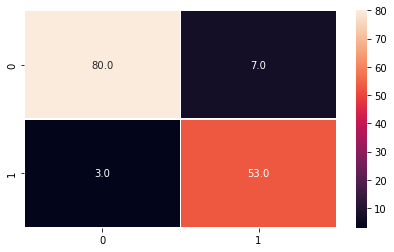

In [ ]:
#Confusion Matrix
cm_dt=metrics.confusion_matrix(Y_test, prediction_DT)
f,ax = plt.subplots(figsize=(7, 4))
sns.heatmap(cm_dt, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

plt.savefig('CM DT.jpeg')
plt.show()

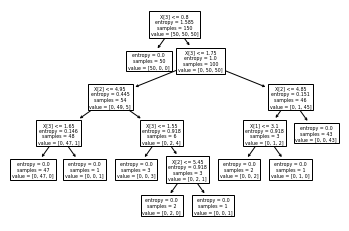

In [ ]:
#To plot the decion tree
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
tree_DT = model_dt.fit(iris.data, iris.target)
tree.plot_tree(tree_DT)
#plt.savefig('DT.png',dpi=300)

plt.savefig('Decison Tree.jpeg')
plt.show()



**Hyper Parameter Tunning of Decison Tree Classifier**

In [ ]:
#Split the data into independent(x) and dependent data(y)
X= BreastData.iloc[:, 2:31].values
Y=BreastData.iloc[:, 1].values
#To split into training and test data (75% training data and 25 % testing data)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Decision Tree Classifier
#hyperparameter tuning 
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
model_dthp = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(model_dthp, parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

# print best parameter after tuning 
print(grid_obj.best_params_) 
grid_predictions = grid_obj.predict(X_test)

# Set the clf to the best combination of parameters
model_dthp = grid_obj.best_estimator_

# Train the model using the training sets 
model_dthp.fit(X_train, Y_train)

# Prediction on test set
pred_dt = model_dthp.predict(X_test)

# Calculating the accuracy
dt_ac = round( metrics.accuracy_score(Y_test,pred_dt) * 100, 2 )
print( 'Accuracy of Decision Tree model with HyperParameters : ', dt_ac )

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Decision Tree model with HyperParameters :  90.91


In [ ]:
#Results:
#Clasification report
results_DThp=metrics.classification_report(Y_test, pred_dt)
print(results_DThp)
print("Training Score: ", model_dthp.score(X_train,Y_train)*100)
print("Testing Score:", model_dthp.score(X_test,Y_test))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.96      0.92      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

Training Score:  96.24413145539906
Testing Score: 0.958041958041958


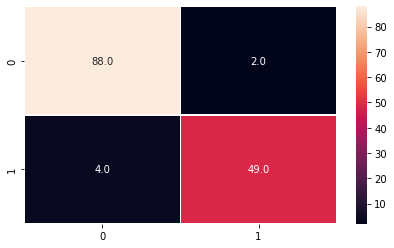

In [ ]:
#Confusion Matrix for decion tree classifier with hyper parameters 
cm_dt=metrics.confusion_matrix(Y_test, pred_dt)
f,ax = plt.subplots(figsize=(7, 4))
sns.heatmap(cm_dt, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

plt.savefig('CM DT with HP.jpeg')
plt.show()

**Naive Bayes**

In [ ]:
#Naive Bayes Clssifier 
from sklearn.naive_bayes import GaussianNB
#Training the model 
model_nb = GaussianNB()
model_nb.fit(X_train, Y_train)

#Prediction 
pred_nb =model_nb.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
acc_nb=(accuracy_score(Y_test, pred_nb)*100)
cm_nb= confusion_matrix(Y_test, pred_nb)
acc_nb

92.3076923076923

In [ ]:
# using metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(Y_test,pred_nb))
print(confusion_matrix(Y_test,pred_nb))
print(accuracy_score(Y_test,pred_nb))
print("Training Score: ", model_nb.score(X_train,Y_train)*100)
print("Testing Score:", model_nb.score(X_test,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        90
           1       0.90      0.89      0.90        53

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

[[85  5]
 [ 6 47]]
0.9230769230769231
Training Score:  95.07042253521126
Testing Score: 0.9230769230769231


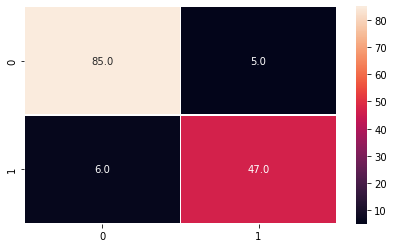

In [ ]:
#Confusion Matrix for decion tree classifier with hyper parameters 
cm_nb=metrics.confusion_matrix(Y_test, pred_nb)
f,ax = plt.subplots(figsize=(7, 4))
sns.heatmap(cm_nb, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

plt.savefig('CM nb.jpeg')
plt.show()

### Naive Bayes with Hyper parameter Tuning 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
model_nbhp = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
model_nbhp.fit(X_train, Y_train)
print(model_nbhp.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.12328467394420659)


              precision    recall  f1-score   support

           0       0.93      0.98      0.95        90
           1       0.96      0.87      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143

[[88  2]
 [ 7 46]]
0.9370629370629371
Training Score:  94.83568075117371
Testing Score: 0.9370629370629371


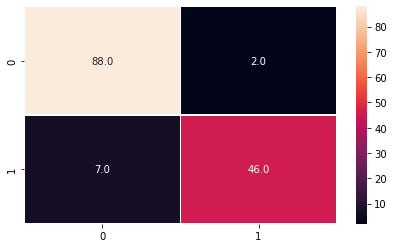

In [ ]:
#Prediction 
pred_nbhp =model_nbhp.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
acc_nbhp=(accuracy_score(Y_test, pred_nbhp)*100)
cm_nb= confusion_matrix(Y_test, pred_nbhp)
acc_nbhp
# using metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(Y_test,pred_nbhp))
print(confusion_matrix(Y_test,pred_nbhp))
print(accuracy_score(Y_test,pred_nbhp))
print("Training Score: ", model_nbhp.score(X_train,Y_train)*100)
print("Testing Score:", model_nbhp.score(X_test,Y_test))

#Confusion Matrix for Naive Bayes with hyper parameters 
cm_nbhp=metrics.confusion_matrix(Y_test, pred_nbhp)
f,ax = plt.subplots(figsize=(7, 4))
sns.heatmap(cm_nbhp, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

plt.savefig('CM nb hp.jpeg')
plt.show()

**Random Forest**

In [ ]:
#Split the data into independent(x) and dependent data(y)
X= BreastData.iloc[:, 2:31].values
Y=BreastData.iloc[:, 1].values
#To split into training and test data (75% training data and 25 % testing data)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create the model
model_rf= RandomForestClassifier()
#Fit the model
model_rf.fit(X_train,Y_train)
# performing predictions on the test dataset
prediction_RF = model_rf.predict(X_test)
# using metrics module for accuracy calculation
acc_rf = (metrics.accuracy_score(Y_test, prediction_RF)*100)
print(acc_rf)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, prediction_RF))

97.2027972027972
ACCURACY OF THE MODEL:  0.972027972027972


              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



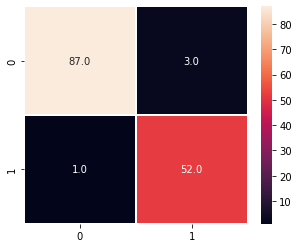

In [ ]:
#Results:

#Clasification report using accuracy metrics
results_rf=metrics.classification_report(Y_test, prediction_RF)
print(results_rf)

#Confusion matrix
cm_rf=metrics.confusion_matrix(Y_test,prediction_RF)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, linewidths=.5, fmt= '.1f',ax=ax);
plt.savefig('CM RF.jpeg')
plt.show()

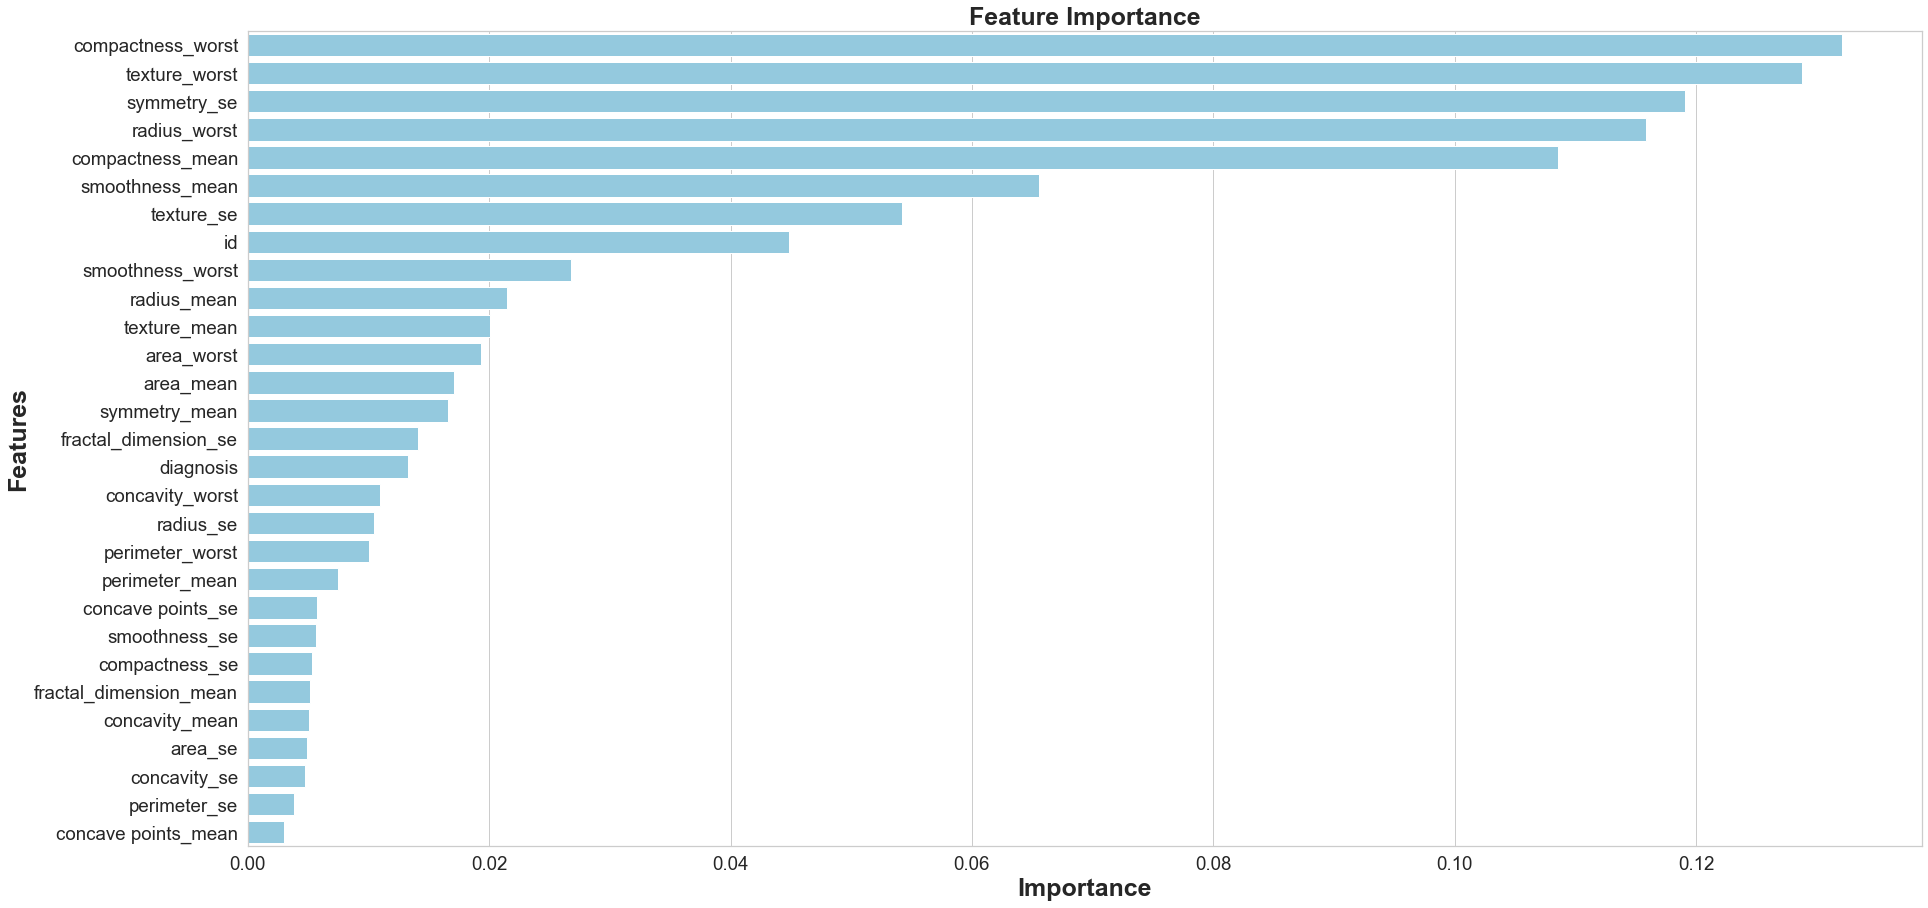

In [ ]:
#Feature Importance 

#Feature Importance 

feats = {}
for feature, importance in zip(BreastData.columns, model_rf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.savefig('feature imoortance .jpeg')
plt.show()

**Principal Component Analysis**

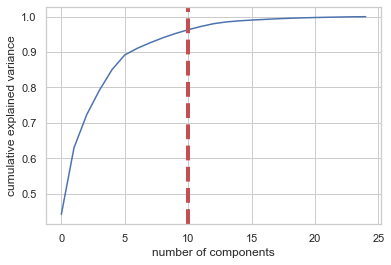

None

<Figure size 432x288 with 0 Axes>

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.441073,0.441073
1,0.629551,0.188478
2,0.722689,0.093138
3,0.791628,0.068939
4,0.850251,0.058623
5,0.891565,0.041314
6,0.910580,0.019015
7,0.925963,0.015383
8,0.940061,0.014097
9,0.952216,0.012156


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=25)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
plt.savefig('PCA Plot.jpeg')
plt.show()
display(pca_df.head(10))

**Random Forest with HyperParameter Tuning**

In [ ]:
#Split the data into independent(x) and dependent data(y)
X= BreastData.iloc[:, 2:31].values
Y=BreastData.iloc[:, 1].values
#To split into training and test data (75% training data and 25 % testing data)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
model_rfhp= RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(model_rfhp, parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

# print best parameter after tuning 
print(grid_obj.best_params_) 
grid_predictions = grid_obj.predict(X_test)

# Set the rf to the best combination of parameters
model_rfhp = grid_obj.best_estimator_

# Train the model using the training sets 
model_rfhp.fit(X_train,Y_train)

#PREDICTION
pred_rfhp = model_rfhp.predict(X_test)

# Calculating the accuracy
acc_rfhp = round( metrics.accuracy_score(Y_test, pred_rfhp) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rfhp )

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}
Accuracy of Random Forest model :  98.6


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



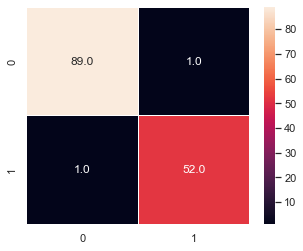

In [ ]:
#Results:

#Clasification report using accuracy metrics
results_rfhp=metrics.classification_report(Y_test, pred_rfhp)
print(results_rfhp)

#Confusion matrix
cm_rfhp=metrics.confusion_matrix(Y_test,pred_rfhp)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rfhp, annot=True, linewidths=.5, fmt= '.1f',ax=ax);
plt.savefig('CM RF with hpp.jpeg')
plt.show()

**SUPPORT VECTOR MACHINES**

In [ ]:

#Support Vector Machines
from sklearn.svm import SVC

model_svm= SVC(probability=True, random_state=0) 
model_svm.fit(X_train, Y_train)
acc_svm = (model_svm.score(X_train, Y_train)*100)
print(acc_svm)
print('SVM Classifier Training Accuracy:', model_svm.score(X_train, Y_train))


90.3755868544601
SVM Classifier Training Accuracy: 0.903755868544601


Accuracy of SVM model :  90.3755868544601
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        90
           1       0.98      0.85      0.91        53

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



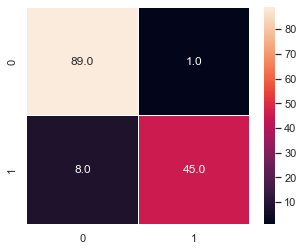

In [ ]:
#Results:
# Prediction on test data
pred_svm = model_svm.predict(X_test)

# Calculating the accuracy
acc_svmhp = round( metrics.accuracy_score(Y_test, pred_svm) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )
#Clasification report using accuracy metrics
results_sv=metrics.classification_report(Y_test,pred_svm)
print(results_sv)

#Confusion matrix
cm_sv=metrics.confusion_matrix(Y_test,pred_svm)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_sv, annot=True, linewidths=.5, fmt= '.1f',ax=ax);
plt.savefig('CM sv.jpeg')
plt.show()

In [ ]:
#Split the data into independent(x) and dependent data(y)
from sklearn import preprocessing
x= BreastData.iloc[:, 2:31].values
y=BreastData.iloc[:, 1].values
x = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [ ]:
# Support Vactor 
from sklearn.svm import SVC
svm = SVC(random_state=10)
svm1 = SVC(kernel='linear',gamma='scale',random_state=10)
svm2 = SVC(kernel='rbf',gamma='scale',random_state=10)
svm3 = SVC(kernel='poly',gamma='scale',random_state=10)
svm4 = SVC(kernel='sigmoid',gamma='scale',random_state=10)

svm.fit(x_train,y_train)
svm1.fit(x_train,y_train)
svm2.fit(x_train,y_train)
svm3.fit(x_train,y_train)
svm4.fit(x_train,y_train)

print('SVC Accuracy : {:,.2f}%'.format(svm.score(x_test,y_test)*100))

print('SVC Liner Accuracy : {:,.2f}%'.format(svm1.score(x_test,y_test)*100))

print('SVC RBF Accuracy : {:,.2f}%'.format(svm2.score(x_test,y_test)*100))

print('SVC Ploy Accuracy : {:,.2f}%'.format(svm3.score(x_test,y_test)*100))

print('SVC Sigmoid Accuracy : {:,.2f}%'.format(svm4.score(x_test,y_test)*100))

SVC Accuracy : 96.50%
SVC Liner Accuracy : 96.50%
SVC RBF Accuracy : 96.50%
SVC Ploy Accuracy : 90.91%
SVC Sigmoid Accuracy : 97.20%


**HyperParameter Optimization with SVM**

In [ ]:
from sklearn import svm
# Create a Support Vector Classifier
model_svmhp = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(model_svmhp, parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the svc to the best combination of parameters
model_svmhp = grid_obj.best_estimator_

# print best parameter after tuning 
print(grid_obj.best_params_) 
grid_predictions = grid_obj.predict(X_test) 

# Train the model using the training sets 
model_svmhp.fit(X_train,Y_train)

# Prediction on test data
pred_svmhp = model_svmhp.predict(X_test)

# Calculating the accuracy
acc_svmhp = round( metrics.accuracy_score(Y_test, pred_svmhp) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

{'C': 1, 'kernel': 'linear'}
Accuracy of SVM model :  90.3755868544601


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        90
           1       0.93      0.98      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



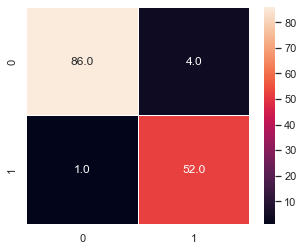

In [ ]:
#Results:

#Clasification report using accuracy metrics
results_svhp=metrics.classification_report(Y_test,pred_svmhp)
print(results_svhp)

#Confusion matrix
cm_svhp=metrics.confusion_matrix(Y_test,pred_svmhp)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_svhp, annot=True, linewidths=.5, fmt= '.1f',ax=ax);
plt.savefig('CM svhp.jpeg')
plt.show()

**K-Nearest Neigbour**

In [ ]:
df= BreastData

In [ ]:
X = df[[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] .values  #.astype(float)
X[0:4]
y= np.array(df['diagnosis'])

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 29) (455,)
Test set: (114, 29) (114,)


In [ ]:
# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
model_knn= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(model_knn)
#predicting part
pred_knn= model_knn.predict(X_test)


KNeighborsClassifier(n_neighbors=4)


In [ ]:
from sklearn import metrics
acc_knn= (metrics.accuracy_score(y_train, model_knn.predict(X_train))*100)
print(acc_knn)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train))*100)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, pred_knn)*100)

97.58241758241758
Train set Accuracy:  97.58241758241758
Test set Accuracy:  94.73684210526315


              precision    recall  f1-score   support

           0       0.93      0.98      0.95        64
           1       0.98      0.90      0.94        50

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



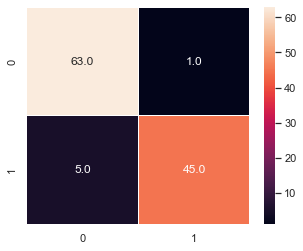

In [ ]:
#Results:

#Clasification report using accuracy metrics
results_knn=metrics.classification_report(y_test,pred_knn)
print(results_knn)

#Confusion matrix
cm_knn=metrics.confusion_matrix(y_test,pred_knn)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, linewidths=.5, fmt= '.1f',ax=ax);
plt.savefig('CM knn.jpeg')
plt.show()

**Cross Validation**

The optimal number of neighbors is  9 


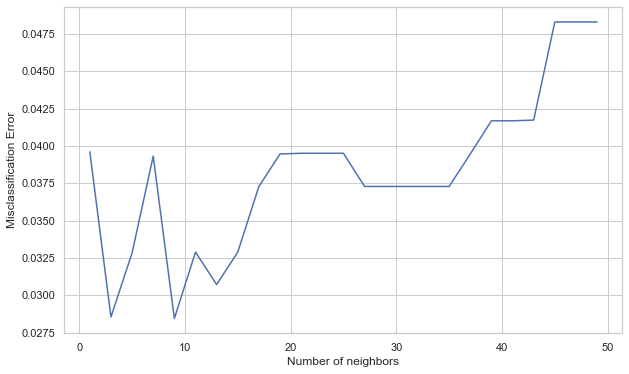

In [ ]:
#Performing cross validation 
neighbors = []
cv_scores = []
  
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

MSE = [1-x for x in cv_scores]
  
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')

plt.savefig('k-nn.jpeg')
plt.show()


In [ ]:
k=6
neigh1=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
print(neigh1)
#predicting
yhat6=neigh1.predict(X_test)
print('Train Accuracy is : ',metrics.accuracy_score(y_train, neigh1.predict(X_train)))
print('test accuracy is : ', metrics.accuracy_score(y_test, yhat6))

KNeighborsClassifier(n_neighbors=6)
Train Accuracy is :  0.9758241758241758
test accuracy is :  0.9385964912280702


In [ ]:
k=5
neigh1=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
print(neigh1)
#predicting
yhat6=neigh1.predict(X_test)
print('Train Accuracy is : ',metrics.accuracy_score(y_train, neigh1.predict(X_train)))
print('test accuracy is : ', metrics.accuracy_score(y_test, yhat6))

KNeighborsClassifier()
Train Accuracy is :  0.9846153846153847
test accuracy is :  0.9473684210526315


In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.93859649, 0.93859649, 0.93859649, 0.94736842])

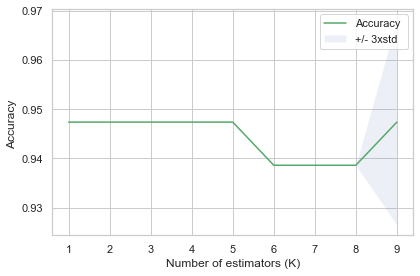

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of estimators (K)')
plt.tight_layout()
plt.savefig('Knn -Number of estimators .jpeg')
plt.show()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.9473684210526315 with k= 1


**K-Nearest Neigbour with Hyper Parameter Tuning**

In [ ]:
#Split the data into independent(x) and dependent data(y)
X= BreastData.iloc[:, 2:31].values
Y=BreastData.iloc[:, 1].values
#To split into training and test data (75% training data and 25 % testing data)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
model_knnhp = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(model_knnhp, parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# print best parameter after tuning 
print(grid_obj.best_params_) 
grid_predictions = grid_obj.predict(X_test)

# Train the model using the training sets 
model_knnhp.fit(X_train,Y_train)

# Prediction on test data
pred_knnhp = model_knnhp.predict(X_test)

# Calculating the accuracy
acc_knnhp = round( metrics.accuracy_score(Y_test, pred_knnhp) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knnhp )

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'uniform'}
Accuracy of KNN model :  95.8


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

[[89  1]
 [ 5 48]]


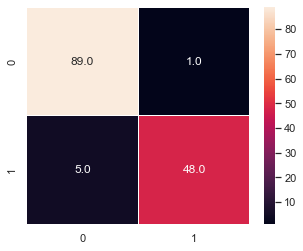

In [ ]:
print(classification_report(Y_test,pred_knnhp))
print(confusion_matrix(Y_test,pred_knnhp))
#Confusion matrix
cm_knn=metrics.confusion_matrix(Y_test,pred_knnhp)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, linewidths=.5, fmt= '.1f',ax=ax);
plt.savefig('CM knnhp.jpeg')
plt.show()

**AdaBoost Classification**

In [ ]:
#Split the data into independent(x) and dependent data(y)
X= BreastData.iloc[:, 2:31].values
Y=BreastData.iloc[:, 1].values
#To split into training and test data (75% training data and 25 % testing data)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_adb = AdaBoostClassifier(base_estimator = None)
model_adb.fit(X_train,Y_train)

pred_adb=model_adb.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(Y_test,pred_adb))

# Calculating the accuracy
acc_adb = round( metrics.accuracy_score(Y_test, pred_adb) * 100, 2 )
print( 'Accuracy of adb model : ', acc_adb )

print("Training Score: ",model_adb.score(X_train,Y_train)*100)


              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy of adb model :  97.9
Training Score:  100.0


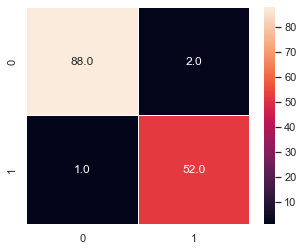

In [ ]:
#Confusion matrix
cm_adb=metrics.confusion_matrix(Y_test,pred_adb)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_adb, annot=True, linewidths=.5, fmt= '.1f',ax=ax);
plt.savefig('CM adb.jpeg')
plt.show()

**Logistic Regression**

In [ ]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
model_lr = LogisticRegression()

# Train the model using the training sets 
model_lr.fit(X_train, Y_train)

# Prediction on test data
pred_lr = model_lr.predict(X_test)

# Calculating the accuracy
acc_lr = round( metrics.accuracy_score(Y_test, pred_lr) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_lr )

Accuracy of Logistic Regression model :  94.41


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

[[86  4]
 [ 4 49]]


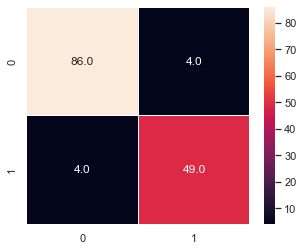

In [ ]:
print(classification_report(Y_test,pred_lr))
print(confusion_matrix(Y_test,pred_lr))


#Confusion matrix
cm_lr=metrics.confusion_matrix(Y_test,pred_lr)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, linewidths=.5, fmt= '.1f',ax=ax);
plt.savefig('CM lr.jpeg')
plt.show()

In [ ]:
#COMPARING THE MODELS 

models = pd.DataFrame({
    'Model': ['Artificial Neural Network',  'Decision Tree', 'Decision Tree with Hyperparameters','Naive Bayes', 'Random Forest','Random Forest with hyperparemeters', 
              'Support Vector Machines', 'Support Vector Machines with hyperparameters',
              'K - Nearest Neighbors', 'K - Nearest Neighbors with hyperparameters','Ada Boost', 'Logistic Regression'],
    'Score': [acc_ann,  acc_dt, dt_ac, acc_nb, acc_rf,acc_rfhp, acc_svm,acc_svmhp, acc_knn, acc_knnhp, acc_adb , acc_lr]})


models

,Model,Score
0,Artificial Neural Network,1.000000
1,Decision Tree,93.006993
2,Decision Tree with Hyperparameters,95.800000
3,Naive Bayes,92.307692
4,Random Forest,97.202797
5,Random Forest with hyperparemeters,98.600000
6,Support Vector Machines,90.375587
7,Support Vector Machines with hyperparameters,96.500000
8,K - Nearest Neighbors,97.582418
9,K - Nearest Neighbors with hyperparameters,95.800000
